# Grid Independence Study

In [1]:
# Imports and physical parameters
import numpy as np
import scipy

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import *
from matplotlib.widgets import Slider

# ddg imports
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from ddgclib._particle_liquid_bridge_flo import *
import numpy as np
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from concurrent import futures

#set parameters for plots
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Arial"
plt.rcParams["mathtext.fontset"] = "custom"
plt.rcParams["mathtext.it"] = "Arial:italic"
plt.rcParams["mathtext.rm"] = "Arial"
plt.rcParams["mathtext.default"] = "it"
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16



In [2]:
def fun_V_analytic(diameter, length):
    V_an = np.pi/4*diameter**2*length
    return V_an

def fun_iterable( refinement_list, tau, t_f, diameter=1, length = 1, gamma=0.0728):
    v_rel_list  = []
    time_list   = []

    #refinement_list = np.arange(2,refinment_end,1)
    V_an = fun_V_analytic(diameter, length)

    v_l         = 0 - length/2  # lower length-coordinate
    v_u         = 0 + length/2   # higher length-coordinate

    for i in range(len(refinement_list)):
        starttime = timer()
        refinement = refinement_list[i]
        print(f'Refinement={refinement_list[i]} wird gestartet')

        dummy_parameter = fun_liquid_bridge(v_l, v_u,tau, t_f,diameter, refinement,gamma) # v_l, v_u, tau, tf, d
        HC = dummy_parameter[0]

        '''
        Volume calculation
        '''
        V_num = 0
        for v in HC.V:
            V_ijk = volume(v)
            #print(V_ijk)
            V_num += np.sum(V_ijk)

        V_num = V_num/12

        v_rel = ((V_an - V_num)/V_an)*100

        endtime = timer()

        print(f"Time elapsed: {endtime-starttime:.2f} s")
        print(f"Volume calculated: {V_num:.2f} m^3")
        print(f"Volume deviation: {v_rel:.2f} %")

        v_rel_list.append(v_rel)
        time_list.append(endtime-starttime)

        print(f'Refinement={refinement_list[i]} ist beendet')

    string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)
    np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
    np.savetxt(string_savename + '_time'+ '.txt',time_list)
    np.savetxt(string_savename + 'refinement_list'+ '.txt', refinement_list)

def volume_fun(refinment_end = 6, tau=0.1, t_f=0, cores = 3 ):
    '''
    refinement=3# NOTE: 2 is the minimum refinement needed for the complex to be manifold
    '''

    if __name__ == "__main__":
        print('Es geht los')
        refinement_list = np.arange(2,refinment_end,1)
        refinement_list = list(refinement_list)
        with futures.ProcessPoolExecutor(max_workers=cores) as e:
            e.submit(fun_iterable,refinement_list)
            print('Alle Aufgaben gestartet')
            e.shutdown()
            print('Alle Aufgaben beendet!')

    # refinement_list = np.arange(2,refinement_end,1)


    print('Ende Gelände')

In [4]:
HC = Complex(3)
HC.load_complex('Complexd3l3ref3.json')

In [ ]:
plot_polyscope(HC)

In [56]:
volume_fun()

Es geht los
Alle Aufgaben gestartet
Alle Aufgaben beendet!
Ende Gelände


In [61]:
def fun_iterable_2( refinement, tau= 0.1, t_f=0, diameter=1, length = 1):
    gamma=0.0728

    starttime = timer()
    v_l         = 0 - length/2  # lower length-coordinate
    v_u         = 0 + length/2   # higher length-coordinate
    V_an = fun_V_analytic(diameter, length)

   # dummy_parameter = fun_liquid_bridge(refinement,v_l=v_l, v_u=v_u,tau=tau, t_f = t_f,diameter = diameter, gamma = gamma)
    dummy_parameter = fun_liquid_bridge(v_l, v_u,tau, t_f,diameter, refinement,gamma)
    HC = dummy_parameter[0]
    '''
    Volume calculation
    '''
    V_num = 0
    for v in HC.V:
        V_ijk = volume(v)
        #print(V_ijk)
        V_num += np.sum(V_ijk)

    V_num = V_num/12

    v_rel = ((V_an - V_num)/V_an)*100

    endtime = timer()

    print(f"Time elapsed: {endtime-starttime:.2f} s")
    print(f"Volume calculated: {V_num:.2f} m^3")
    print(f"Volume deviation: {v_rel:.2f} %")

    v_rel_list.append(v_rel)
    time_list.append(endtime-starttime)

    #print(f'Refinement={refinement_list[i]} ist beendet')


"""
def volume_fun2(refinement_end =5, diameter = 2, length = 1,core = 2):

    v_rel_list  = []
    time_list   = []
    refinement_list = []

    print('Start')

    if __name__ == "__main__":
        with futures.ProcessPoolExecutor(max_workers=core) as e:
            e.submit(fun_iterable_2(refinement=2))
            e.submit(fun_iterable_2,3)
            e.submit(fun_iterable_2,4)
            e.submit(fun_iterable_2,5)
    print('Alle Aufgaben gestartet')
    e.shutdown()
    print('Alle Aufgaben erledigt')



    string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)
    np.savetxt(string_savename + '_vrel'+ '.txt',v_rel_list)
    np.savetxt(string_savename + '_time'+ '.txt',time_list)
    np.savetxt(string_savename + 'refinement_list'+ '.txt', refinement_list)


"""


v_rel_list  = []
time_list   = []
refinement_end = 4
tau = 0.1
t_f = 0
diameter = 1
length = 1


#fun_iterable_2( refinement, tau= 0.1, t_f=0, diameter=1, length = 1):
if '__name__' == '__main__':
    tau_value = tau
    t_f_value = t_f
    length_value = length
    diameter_value = diameter

    refinement_values = np.arange(2,refinement_end,1)
    print(refinement_values)

    max_workers = 3

    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        #results = list(executor.map(f, x_values, [y_value]*len(x_values), [z_value]*len(x_values)))
        results = list(executor.map(fun_iterable_2,refinement_values,[tau_value]*len(refinement_values),[t_f_value]*len(refinement_values),[length_value]*len(refinement_values),[diameter_value]*len(refinement_values)))

        print(results)
        print('Ende')



In [62]:
print(refinement_values)



NameError: name 'refinement_values' is not defined

In [64]:

import numpy as np
from concurrent.futures import ProcessPoolExecutor

# Die Funktion, die parallel berechnet werden soll
def f(x, y, z=0):
    return x * y + z

if __name__ == '__main__':
    # Definiere die konstanten Werte für y und z
    y_value = 3
    z_value = 2

    # Definiere die Werte für x als NumPy-Array
    x_values = np.array([1, 2, 3, 4])

    # Definiere die maximale Anzahl der gleichzeitig arbeitenden Prozesse
    max_workers = 3

    # Erstelle einen ProcessPoolExecutor mit der angegebenen Anzahl von max_workers
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        # Verwende die map-Funktion, um die Funktion parallel für jeden Wert von x auszuführen
        results = list(executor.map(f, x_values.tolist(), [y_value]*len(x_values), [z_value]*len(x_values)))

    # Gib die Ergebnisse aus
    print(results)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

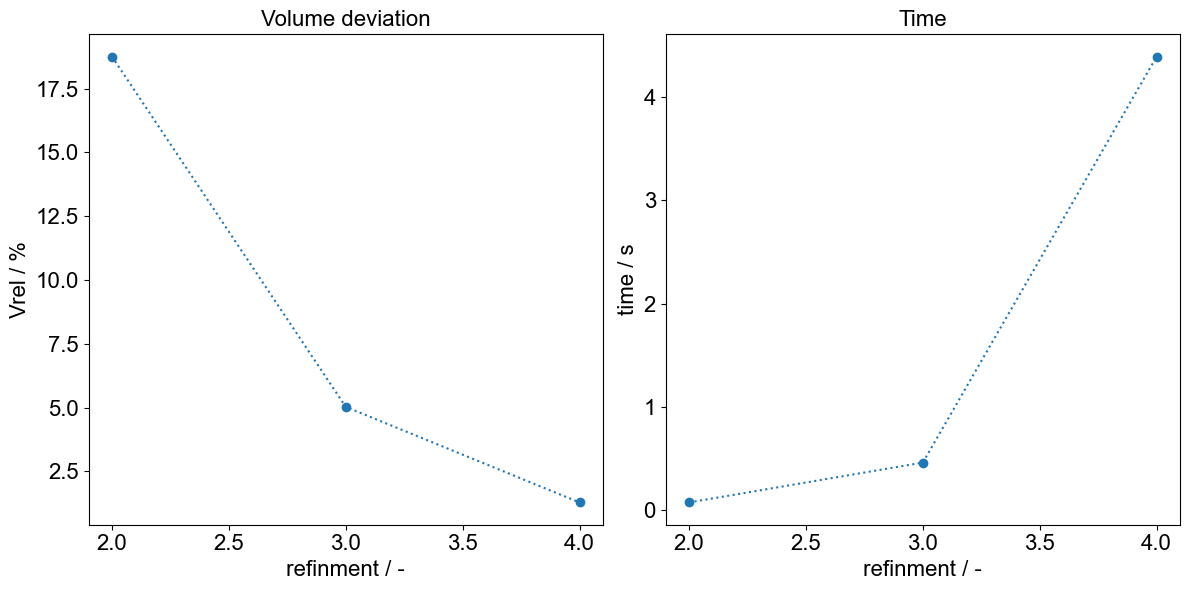

In [19]:
diameter = 1
length = 1
refinment_end = 4

string_savename     = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)

refinement_list = np.loadtxt(string_savename + 'refinement_list'+ '.txt')
time_list = np.loadtxt(string_savename + '_time'+ '.txt')
v_rel_list = np.loadtxt(string_savename + '_vrel'+ '.txt')

'''
Plot the data
'''
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].plot(refinement_list, v_rel_list,"o:",color="tab:blue")
ax[1].plot(refinement_list, time_list,"o:",color="tab:blue")


ax[0].set_title('Volume deviation')
ax[1].set_title('Time')

ax[0].set_ylabel("Vrel / %")
ax[1].set_ylabel("time / s")

ax[0].set_xlabel("refinment / -")
ax[1].set_xlabel("refinment / -")

plt.tight_layout()
plt.savefig("volume_refinment_validation.png")


# ChatGPT

In [51]:
from concurrent.futures import ProcessPoolExecutor
from timeit import default_timer as timer
import numpy as np

def fun_V_analytic(diameter, length):
    V_an = np.pi/4*diameter**2*length
    return V_an

# Die Funktion, die parallel berechnet werden soll
def calculate_volume(refinement):
    starttime = timer()

    dummy_parameter = fun_liquid_bridge(v_l, v_u, tau, t_f, diameter, refinement, gamma)
    HC = dummy_parameter[0]

    V_num = 0
    for v in HC.V:
        V_ijk = volume(v)
        V_num += np.sum(V_ijk)

    V_num = V_num / 12

    v_rel = ((V_an - V_num) / V_an) * 100

    endtime = timer()

    print(f"Time elapsed: {endtime - starttime:.2f} s")
    print(f"Volume calculated: {V_num:.2f} m^3")
    print(f"Volume deviation: {v_rel:.2f} %")

    return v_rel, endtime - starttime

diameter = 1
length  = 1
v_l     = 0 - length/2  # lower length-coordinate
v_u     = 0 + length/2   # higher length-coordinate
gamma   =0.0728

tau = 0.1  # Fülle die Werte entsprechend deiner Anforderungen ein
t_f =0  # Fülle die Werte entsprechend deiner Anforderungen ein
V_an = fun_V_analytic(diameter, length)
refinment_end = 5

if __name__ == '__main__':
    # Definiere die Parameter
    v_l =  v_l# Fülle die Werte entsprechend deiner Anforderungen ein
    v_u =  v_u# Fülle die Werte entsprechend deiner Anforderungen ein
    tau = tau  # Fülle die Werte entsprechend deiner Anforderungen ein
    t_f =  t_f # Fülle die Werte entsprechend deiner Anforderungen ein
    diameter =  diameter# Fülle die Werte entsprechend deiner Anforderungen ein
    gamma =  gamma# Fülle die Werte entsprechend deiner Anforderungen ein
    V_an =  V_an# Fülle die Werte entsprechend deiner Anforderungen ein
    refinement_list = np.arange(2,refinment_end,1)  # Fülle die Werte entsprechend deiner Anforderungen ein
    string_savename = 'd'+ str(diameter) + 'l' + str(length) + 'ref' + str(refinement_end)  # Fülle die Werte entsprechend deiner Anforderungen ein

    # Ergebnislisten initialisieren
    v_rel_list = []
    time_list = []

    # Definiere die maximale Anzahl der gleichzeitig arbeitenden Prozesse
    max_workers = 3  # Du kannst die Anzahl der Prozessorkerne entsprechend deiner Anforderungen ändern

    # Erstelle einen ProcessPoolExecutor mit der angegebenen Anzahl von max_workers
    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        # Verwende die map-Funktion, um die Funktion parallel für jeden Wert in refinement_list auszuführen
        results = list(executor.map(calculate_volume, refinement_list))

    # Extrahiere die Ergebnisse
    v_rel_list, time_list = zip(*results)

    # Speichere die Ergebnisse in Dateien
    np.savetxt(string_savename + '_vrel' + '.txt', v_rel_list)
    np.savetxt(string_savename + '_time' + '.txt', time_list)

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [ ]:
'''
Plot the data
'''
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12, 6))


ax[0].plot(refinement_list, v_rel_list,"o:",color="tab:blue")
ax[1].plot(refinement_list, time_list,"o:",color="tab:blue")


ax[0].set_title('Volume deviation')
ax[1].set_title('Time')

ax[0].set_ylabel("Vrel / %")
ax[1].set_ylabel("time / s")

ax[0].set_xlabel("refinment / -")
ax[1].set_xlabel("refinment / -")

plt.tight_layout()
plt.savefig("volume_refinment_validation.png")

In [ ]:
import numpy as np
from multiprocessing import Pool

# Die Funktion, die parallel berechnet werden soll
def f(args):
    x, y, z = args
    return x * y + z

if __name__ == '__main__':
    # Definiere die konstanten Werte für y und z
    y_value = 3
    z_value = 2

    # Definiere die Werte für x als NumPy-Array
    x_values = np.array([1, 2, 3, 4])

    # Definiere die maximale Anzahl der gleichzeitig arbeitenden Prozesse
    max_workers = 3

    # Erstelle einen Pool mit mehreren Prozessen (hier verwenden wir die Anzahl der verfügbaren CPU-Kerne)
    with Pool(max_workers) as pool:
        # Verwende die map-Funktion, um die Funktion parallel für jeden Wert von x auszuführen
        results = pool.map(f, zip(x_values, [y_value]*len(x_values), [z_value]*len(x_values)))

    # Gib die Ergebnisse aus
    print(results)